In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt  
import glob
import xarray as xr

In [344]:
!pip install netcdf4
!pip install pydap

In [345]:
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

  Using cached https://files.pythonhosted.org/packages/44/ec/4eddbf9d17a917c51fb4ad159aa7137f506681e91ab559cf87d120e1d78d/Shapely-1.7.0.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Successfully uninstalled Shapely-1.7.0
    Running setup.py install for shapely ... done


In [0]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/My Drive"
# !ls "/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access"
# files_2016 = glob.glob("/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access/2016/*.nc")
# files_2016 = np.unique(files_2016)

In [0]:
# years = np.arange(1996,2020)
# gcpc_daily_data_directory = "/content/drive/My Drive/noaa_data_project3/data/global-precipitation-climatology-project-gpcp-daily/access/"

# #Calculate total number of days in dataset
# count = 0
# times = []
# for i in range(0,len(years)): 
#   nc_files = sorted(glob.glob(gcpc_daily_data_directory + str(years[i]) + "/*.nc"))
#   for n in range(0,len(nc_files)):
#     filename = nc_files[n].replace(gcpc_daily_data_directory+str(years[i]),'')
#     date = filename.split('_')[3].replace('d','')
#     date = pd.to_datetime(date, format='%Y%m%d')
#     times = np.append(times, date)

In [0]:
# latitude = np.arange(-90.0,90.0)
# longitude = np.arange(0.0,360.0)
# data = np.zeros((len(times),len(latitude),len(longitude),1))
# # precip_agg = xr.DataArray(data, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])

# count = 0
# for i in range(0, len(years)): #len(years)
#   print(i)
#   nc_files = glob.glob(gcpc_daily_data_directory + str(years[i]) + "/*.nc")
#   for n in range(0, len(nc_files)):
#     try:
#       nc = xr.open_dataset(nc_files[n])
#       ncvar = nc['precip']
#       precip = ncvar.mean(axis=0)
#       data[count,:,:,0] = precip
#     except:
#       continue
#     count = count + 1

# precip_agg = xr.DataArray(data, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])

In [0]:
# data1 = data.squeeze(axis=3)
# precip_agg = xr.DataArray(data1, coords=[times, latitude, longitude], dims=['time', 'latitude', 'longitude'])
# precip_agg.to_netcdf('/content/drive/My Drive/Aggregate_GCPC_daily_1996_2019.nc')

In [0]:
# !ls "/content/drive/My Drive"
# precip_agg = xr.open_dataset("/content/drive/My Drive/Aggregate_GCPC_daily_1996_2019.nc")

In [0]:
# def is_djf(month):
#     return (month == 12) | (month <= 2)
    
# pcp_j = precip_agg.sel(latitude=-6.21,longitude=106.85,method='nearest')
# pcp_j = pcp_j.sel(time=is_djf(pcp_j['time.month']))
# pcp_j = pcp_j.where(pcp_j != -99999.0)
# pcp_j = pcp_j.where(pcp_j < 200.)
# pcp_quant = pcp_j.quantile(0.95)
# precip = pcp_j.to_array()
# pcp_quant = pcp_quant.to_array().values
# pcp_above_dates = pcp_j['time'][np.where(precip[0,:]>=pcp_quant[:])]
# pcp_above_dates

In [0]:
# nbins = 1000
# counts, edges = np.histogram(precip[0,:], bins=nbins, range=(0,200), density = False)

# # cdf
# cdf = np.cumsum(counts)/len(precip[0,:])

# #To find the 95%-ile rainfall
# rain_95 = pcp_quant #approximately
# x = np.zeros(100)
# y = np.zeros(100)
# x[:] = rain_95
# y[:] = 0.95

# plt.figure(figsize=(6,6))
# ax = plt.gca()
# plt.plot(edges[1:], cdf)
# plt.scatter(x,np.arange(0,1.,0.01),color='k',s=6.)
# plt.scatter(np.arange(0,70.,70/100),y,color='r',s=6.)
# plt.plot(y,y,'k')
# plt.ylabel('CDF', fontsize=14)
# plt.xlabel('Daily Average Rainfall near Jakarta (mm)', fontsize=14)

# # Major ticks every 20, minor ticks every 5
# major_ticks = np.arange(0, 101, 10)
# minor_ticks = np.arange(0, 101, 5)

# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks/100.)
# ax.set_yticks(minor_ticks/100., minor=True)

# plt.grid()

# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)

# plt.xlim(-.50,70.)
# plt.ylim(0.3,1.05)
# plt.show()

In [0]:
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(10, 5))

# # plot the cumulative histogram
# n, bins, patches = ax.hist(precip[0,:], 20, linewidth=2.0, color='darkblue', density=True, histtype='step', cumulative=True)
# plt.vlines(pcp_quant,0,1.1, linestyles='dashed', label='95th percentile', alpha=0.8)
# plt.legend(loc='lower right')
# ax.set_xlim(0,65)
# ax.set_ylim(0,1.03)
# ax.set_xlabel('Precipitation (mm/day)', fontsize=14)
# ax.set_ylabel('Probability', fontsize=14)
# ax.tick_params(axis='both', which='major', labelsize=14)

In [0]:
# nc_jakarta = precip_agg.sel(latitude = -6., longitude = 107., method='nearest')
# jakarta = nc_jakarta.to_array()

# jakarta[np.where(jakarta>200.)] = np.nan
# jakarta[np.where(jakarta<0.)] = np.nan

# plt.figure(figsize=(6,6))
# plt.plot(nc_jakarta.time,jakarta[0,:])
# plt.xlabel('Year')
# plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
# plt.show()

In [0]:
# _, index = np.unique(nc_jakarta['time'], return_index=True) #Remove duplicate timestamps if any
# nc_jakarta = nc_jakarta.isel(time=index)
# jakarta = nc_jakarta.to_array()

# jakarta[np.where(jakarta>200.)] = np.nan
# jakarta[np.where(jakarta<0.)] = np.nan

# monthly = jakarta.resample(time='1MS').mean()
# upsampled_monthly = monthly.resample(time='1D').ffill()
# anomalies = jakarta - upsampled_monthly

# plt.figure(figsize=(6,6))
# plt.plot(nc_jakarta.time[29:],anomalies[0,:])
# plt.xlabel('Year')
# plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
# plt.show()

In [0]:
#3 months - August - November 2006
# jakarta_months = nc_jakarta.loc[dict(time=slice('2006-08-01', '2006-11-01'))]
# months_data = np.squeeze(jakarta_months.to_array())

# plt.figure(figsize=(6,6))
# ax = plt.gca()
# plt.plot(jakarta_months.time,months_data)
# plt.xlabel('Year')
# plt.ylabel('Daily Average Rainfall near Jakarta (mm)')
# ax.tick_params(axis='x', rotation=45)
# plt.show()

In [0]:
# nbins = 1000
# counts, edges = np.histogram(months_data, bins=nbins, density = False)

# # cdf
# cdf = np.cumsum(counts)/len(months_data)

# #To find the 95%-ile rainfall
# rain_95 = np.mean(edges[np.where(abs(cdf-0.95)==np.min(abs(cdf-0.95)))]) #approximately
# x = np.zeros(100)
# y = np.zeros(100)
# x[:] = rain_95
# y[:] = 0.95

# plt.figure(figsize=(6,6))
# ax = plt.gca()
# plt.plot(edges[1:], cdf)
# plt.scatter(x,np.arange(0,1.,0.01),color='k',s=6.)
# plt.scatter(np.arange(0,70.,70/100),y,color='r',s=6.)
# plt.plot(y,y,'k')
# plt.ylabel('CDF', fontsize=14)
# plt.xlabel('Daily Average Rainfall near Jakarta (mm)', fontsize=14)

# # Major ticks every 20, minor ticks every 5
# major_ticks = np.arange(0, 101, 10)
# minor_ticks = np.arange(0, 101, 5)

# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
# ax.set_yticks(major_ticks/100.)
# ax.set_yticks(minor_ticks/100., minor=True)

# plt.grid()

# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)

# plt.xlim(-.50,70.)
# plt.ylim(0.3,1.05)
# plt.show()

In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
Precip_All = xr.open_dataset("/content/drive/My Drive/Colab Notebooks/Project 3/Aggregate_GCPC_daily_1996_2019.nc")

def is_djf(month):
    return (month == 12) | (month <= 2)
    
pcp_j = Precip_All.sel(latitude=-6.21,longitude=106.85,method='nearest') #extract precipitation from nearest grid point to Jakarta, Indonesia
pcp_j = pcp_j.sel(time=is_djf(pcp_j['time.month']))
pcp_j = pcp_j.where(pcp_j != -99999.0)
pcp_j = pcp_j.where(pcp_j < 200.) #only extract precipitation data < 200mm/day
pcp_quant = pcp_j.quantile(0.95) #only extract 95th quantile precipitation
precip = pcp_j.to_array()
pcp_quant = pcp_quant.to_array().values
ExtremePrecip_dates = pcp_j['time'][np.where(precip[0,:]>=pcp_quant[:])]
#precip[0,:][np.where(precip[0,:]>=pcp_quant[:])]

In [360]:
dates_year = ExtremePrecip_dates[ExtremePrecip_dates['time.year'].values ==1996]
dates_year

<xarray.DataArray 'time' (time: 3)>
array(['1996-12-13T00:00:00.000000000', '1996-12-21T00:00:00.000000000',
       '1996-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time       (time) datetime64[ns] 1996-12-13 1996-12-21 1996-12-31
    latitude   float64 -6.0
    longitude  float64 107.0

In [0]:
## Import NCEP Reanalysis fields directly from the NOAA THREDDS server, selecting only the extreme precipitation days

#days = pd.date_range(start='1996-01-01', end='2019-12-31', freq='D') # selecting daily data from 1996-2019
#days = days[(days.month==12)|(days.month==1)|(days.month==2)] # selecting only DJF from 1996-2019

years = np.arange(1996,2020)

datasets_Uwind_250hPa = []
datasets_Vwind_250hPa = []
datasets_GeopHgt_500hPa = []
datasets_Uwind_500hPa = []
datasets_Vwind_500hPa = []
datasets_Omega_500hPa = []
datasets_Uwind_850hPa = []
datasets_Vwind_850hPa = []
datasets_SpecHum_850hPa = []
datasets_AirTemp_850hPa = []
datasets_Uwind_sig995 = []
datasets_Vwind_sig995 = []
datasets_SkinTemp_Sfc = []
datasets_PrecipWater = []

for iyr in years:

    print('working on '+str(iyr))

    if len(ExtremePrecip_dates[ExtremePrecip_dates['time.year'].values ==iyr]) > 0:
      dates_year = ExtremePrecip_dates[ExtremePrecip_dates['time.year'].values ==iyr]

      #Extract data
      ds_Uwind_250hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=250, time=dates_year)
      ds_Vwind_250hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=250, time=dates_year)
      ds_GeopHgt_500hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=500, time=dates_year)
      ds_Uwind_500hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=500, time=dates_year)
      ds_Vwind_500hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=500, time=dates_year)
      ds_Omega_500hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/omega.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=500, time=dates_year)
      ds_Uwind_850hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=850, time=dates_year)
      ds_Vwind_850hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=850, time=dates_year)
      ds_SpecHum_850hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/shum.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=850, time=dates_year)
      ds_AirTemp_850hPa = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/air.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            level=850, time=dates_year)
      ds_Uwind_sig995 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/uwnd.sig995.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            time=dates_year)
      ds_Vwind_sig995 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/vwnd.sig995.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            time=dates_year)
      ds_SkinTemp_Sfc = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            time=dates_year)
      ds_PrecipWater = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/pr_wtr.eatm.'+str(iyr)+'.nc',engine='netcdf4').sel(\
                            time=dates_year)

      #Append data
      datasets_Uwind_250hPa.append(ds_Uwind_250hPa)
      datasets_Vwind_250hPa.append(ds_Vwind_250hPa)
      datasets_GeopHgt_500hPa.append(ds_GeopHgt_500hPa)
      datasets_Uwind_500hPa.append(ds_Uwind_500hPa)
      datasets_Vwind_500hPa.append(ds_Vwind_500hPa)
      datasets_Omega_500hPa.append(ds_Omega_500hPa)
      datasets_Uwind_850hPa.append(ds_Uwind_850hPa)
      datasets_Vwind_850hPa.append(ds_Vwind_850hPa)
      datasets_SpecHum_850hPa.append(ds_SpecHum_850hPa)
      datasets_AirTemp_850hPa.append(ds_AirTemp_850hPa)
      datasets_Uwind_sig995.append(ds_Uwind_sig995)
      datasets_Vwind_sig995.append(ds_Vwind_sig995)
      datasets_SkinTemp_Sfc.append(ds_SkinTemp_Sfc)
      datasets_PrecipWater.append(ds_PrecipWater)


#Combine DJF extreme precipitation days from each yearly file into 1 file
combined_Uwind_250hPa = xr.concat(datasets_Uwind_250hPa, dim='time')
combined_Vwind_250hPa = xr.concat(datasets_Vwind_250hPa, dim='time')
combined_GeopHgt_500hPa = xr.concat(datasets_GeopHgt_500hPa, dim='time')
combined_Uwind_500hPa = xr.concat(datasets_Uwind_500hPa, dim='time')
combined_Vwind_500hPa = xr.concat(datasets_Vwind_500hPa, dim='time')
combined_Omega_500hPa = xr.concat(datasets_Omega_500hPa, dim='time')
combined_Uwind_850hPa = xr.concat(datasets_Uwind_850hPa, dim='time')
combined_Vwind_850hPa = xr.concat(datasets_Vwind_850hPa, dim='time')
combined_SpecHum_850hPa = xr.concat(datasets_SpecHum_850hPa, dim='time')
combined_AirTemp_850hPa = xr.concat(datasets_AirTemp_850hPa, dim='time')
combined_Uwind_sig995 = xr.concat(datasets_Uwind_sig995, dim='time')
combined_Vwind_sig995 = xr.concat(datasets_Vwind_sig995, dim='time')
combined_SkinTemp_Sfc = xr.concat(datasets_SkinTemp_Sfc, dim='time')
combined_PrecipWater = xr.concat(datasets_PrecipWater, dim='time')

#Convert Dataset files into Netcdf 
combined_Uwind_250hPa.to_netcdf('combined_Uwind_250hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_250hPa.to_netcdf('combined_Vwind_250hPa_1996to2019_ExtremePrecipDays.nc')
combined_GeopHgt_500hPa.to_netcdf('combined_GeopHgt_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_500hPa.to_netcdf('combined_Uwind_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_500hPa.to_netcdf('combined_Vwind_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Omega_500hPa.to_netcdf('combined_Omega_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_850hPa.to_netcdf('combined_Uwind_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_850hPa.to_netcdf('combined_Vwind_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_SpecHum_850hPa.to_netcdf('combined_SpecHum_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_AirTemp_850hPa.to_netcdf('combined_AirTemp_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_sig995.to_netcdf('combined_Uwind_sig995_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_sig995.to_netcdf('combined_Vwind_sig995_1996to2019_ExtremePrecipDays.nc')
combined_SkinTemp_Sfc.to_netcdf('combined_SkinTemp_Sfc_1996to2019_ExtremePrecipDays.nc')
combined_PrecipWater.to_netcdf('combined_PrecipWater_1996to2019_ExtremePrecipDays.nc')

#Move newly-created Netcdf files into your Google Drive 
!mv *.nc "/content/drive/My Drive/"

**Analysis of Reanalysis Data**

In [349]:
## Importing Long-term Mean NCEP Reanalysis data from 1981-2010, only selecting DJF

months = xr.cftime_range(start='0001-01-01', end='0001-12-01', freq='MS', calendar = 'standard') # selecting long-term mean data for 1981-2010 with cftime.DatetimeGregorian format
months = months[(months.month==12)|(months.month==1)|(months.month==2)] # selecting long-term mean data for DJF in 1981-2010

# Extract data
ds_Uwind_250hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=250, time = months)
ds_Vwind_250hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=250, time = months)
ds_GeopHgt_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Uwind_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Vwind_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Omega_500hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/omega.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=500, time = months)
ds_Uwind_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_Vwind_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_SpecHum_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_AirTemp_850hPa_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      level=850, time = months)
ds_Uwind_sig995_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_Vwind_sig995_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_SkinTemp_Sfc_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)
ds_PrecipWater_LTM = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.mon.1981-2010.ltm.nc',engine='netcdf4').sel(\
                      time = months)

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [0]:
## Read in combined reanalysis netcdf files, which contain only the extreme precipitation days

from netCDF4 import Dataset

combined_Uwind_250hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Uwind_250hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_250hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Vwind_250hPa_1996to2019_ExtremePrecipDays.nc')
combined_GeopHgt_500hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_GeopHgt_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_500hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Uwind_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_500hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Vwind_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Omega_500hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Omega_500hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_850hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Uwind_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_850hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Vwind_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_SpecHum_850hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_SpecHum_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_AirTemp_850hPa = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_AirTemp_850hPa_1996to2019_ExtremePrecipDays.nc')
combined_Uwind_sig995 = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Uwind_sig995_1996to2019_ExtremePrecipDays.nc')
combined_Vwind_sig995 = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_Vwind_sig995_1996to2019_ExtremePrecipDays.nc')
combined_SkinTemp_Sfc = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_SkinTemp_Sfc_1996to2019_ExtremePrecipDays.nc')
combined_PrecipWater = xr.open_dataset('/content/drive/My Drive/Colab Notebooks/Project 3/combined_PrecipWater_1996to2019_ExtremePrecipDays.nc')

In [0]:
## Calculate Mean Composite maps over (1) Extreme Precipitation Days & (2) Seasonal Anomalies

# Mean of daily reanalysis fields over extreme precipitation days
combined_Uwind_250hPa_AVG = np.mean(combined_Uwind_250hPa['uwnd'], axis=0)
combined_Vwind_250hPa_AVG = np.mean(combined_Vwind_250hPa['vwnd'], axis=0)
combined_Uwind_500hPa_AVG = np.mean(combined_Uwind_500hPa['uwnd'], axis=0)
combined_Vwind_500hPa_AVG = np.mean(combined_Vwind_500hPa['vwnd'], axis=0)
combined_GeopHgt_500hPa_AVG = np.mean(combined_GeopHgt_500hPa['hgt'], axis=0)
combined_Omega_500hPa_AVG = np.mean(combined_Omega_500hPa['omega'], axis=0)
combined_Uwind_850hPa_AVG = np.mean(combined_Uwind_850hPa['uwnd'], axis=0)
combined_Vwind_850hPa_AVG = np.mean(combined_Vwind_850hPa['vwnd'], axis=0)
combined_SpecHum_850hPa_AVG = np.mean(combined_SpecHum_850hPa['shum']*1000, axis=0)
combined_AirTemp_850hPa_AVG = np.mean(combined_AirTemp_850hPa['air'], axis=0)
combined_Uwind_sig995_AVG = np.mean(combined_Uwind_sig995['uwnd'], axis=0)
combined_Vwind_sig995_AVG = np.mean(combined_Vwind_sig995['vwnd'], axis=0)
combined_SkinTemp_Sfc_AVG = np.mean(combined_SkinTemp_Sfc['skt'], axis=0)
combined_PrecipWater_AVG = np.mean(combined_PrecipWater['pr_wtr'], axis=0)

# Seasonal Anomaly fields: [mean daily reanalysis fields over extreme precipitation days] - [mean over DJF for long-term mean fields]
combined_Uwind_250hPa_Anomaly = combined_Uwind_250hPa_AVG - np.mean(ds_Uwind_250hPa_LTM['uwnd'], axis=0)
combined_Vwind_250hPa_Anomaly = combined_Vwind_250hPa_AVG - np.mean(ds_Vwind_250hPa_LTM['vwnd'], axis=0)
combined_Uwind_500hPa_Anomaly = combined_Uwind_500hPa_AVG - np.mean(ds_Uwind_500hPa_LTM['uwnd'], axis=0)
combined_Vwind_500hPa_Anomaly = combined_Vwind_500hPa_AVG - np.mean(ds_Vwind_500hPa_LTM['vwnd'], axis=0)
combined_GeopHgt_500hPa_Anomaly = combined_GeopHgt_500hPa_AVG - np.mean(ds_GeopHgt_500hPa_LTM['hgt'], axis=0)
combined_Omega_500hPa_Anomaly = combined_Omega_500hPa_AVG - np.mean(ds_Omega_500hPa_LTM['omega'], axis=0)
combined_Uwind_850hPa_Anomaly = combined_Uwind_850hPa_AVG - np.mean(ds_Uwind_850hPa_LTM['uwnd'], axis=0)
combined_Vwind_850hPa_Anomaly = combined_Vwind_850hPa_AVG - np.mean(ds_Vwind_850hPa_LTM['vwnd'], axis=0)
combined_SpecHum_850hPa_Anomaly = combined_SpecHum_850hPa_AVG - np.mean(ds_SpecHum_850hPa_LTM['shum'], axis=0)
combined_AirTemp_850hPa_Anomaly = combined_AirTemp_850hPa_AVG - np.mean(ds_AirTemp_850hPa_LTM['air']+273.15, axis=0)
combined_Uwind_sig995_Anomaly = combined_Uwind_sig995_AVG - np.mean(ds_Uwind_sig995_LTM['uwnd'], axis=0)
combined_Vwind_sig995_Anomaly = combined_Vwind_sig995_AVG - np.mean(ds_Vwind_sig995_LTM['vwnd'], axis=0)
combined_SkinTemp_Sfc_Anomaly = combined_SkinTemp_Sfc_AVG - np.mean(ds_SkinTemp_Sfc_LTM['skt']+273.15, axis=0)
combined_PrecipWater_Anomaly = combined_PrecipWater_AVG - np.mean(ds_PrecipWater_LTM['pr_wtr'], axis=0)

In [0]:
# pressure_levels = ['surface', '850', '500', '250']
# quant_surface = ['temperature', 'winds']
# quant_850 = ['temperature', 'SH', 'winds']
# quant_500 = ['winds', 'hgt']
# quant_250 = ['wind_vecs', 'winds']
# temp_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/air.day.1981-2010.ltm.nc"
# hgt_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/hgt.day.1981-2010.ltm.nc"
# uwnd_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/uwnd.day.1981-2010.ltm.nc"
# vwnd_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/vwnd.day.1981-2010.ltm.nc"
# RH_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/rhum.day.1981-2010.ltm.nc"
# SH_reanalysis = "/content/drive/My Drive/noaa_reanalysis_data/shum.day.1981-2010.ltm.nc"


# for i in range(1,2): #len(pressure_levels)
#      quant = quant_850
#      for j in range(1,2): #len(quant)
#         print(quant[j])
#         if (quant[j] == 'SH'):
#           nc = xr.open_dataset(SH_reanalysis)

**Anomaly composites for DJF over Jakarta, Indonesia**

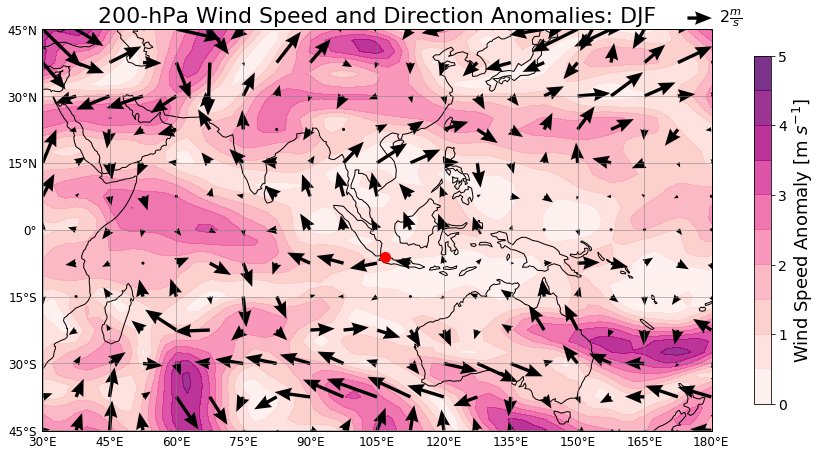

In [438]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
plt.title('200-hPa Wind Speed and Direction Anomalies: DJF', fontsize=22)
ax.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
WindSpeed_250hPa_Anomaly = np.sqrt(combined_Uwind_250hPa_Anomaly**2 + combined_Vwind_250hPa_Anomaly**2)
c1 = ax.contourf(combined_Uwind_250hPa_Anomaly.lon, combined_Uwind_250hPa_Anomaly.lat, WindSpeed_250hPa_Anomaly,levels=np.linspace(0,5,11),transform=ccrs.PlateCarree(),cmap='RdPu', alpha=0.8)
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax.coastlines()
ax.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q = ax.quiver(combined_Uwind_250hPa_Anomaly.lon[::3].values, combined_Uwind_250hPa_Anomaly.lat[::3].values, 
         combined_Uwind_250hPa_Anomaly[::3,::3].values, combined_Vwind_250hPa_Anomaly[::3,::3].values, scale=55., width=0.005, headwidth=4., headlength=5.)
ax.quiverkey(Q, 0.745, 0.87, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb = fig.colorbar(c1, shrink=0.8)
cb.set_label('Wind Speed Anomaly [m $s^{-1}$]', fontsize=18)
cb.set_ticks(np.arange(0,6,1))
cb.ax.tick_params(labelsize=14)

plt.show()

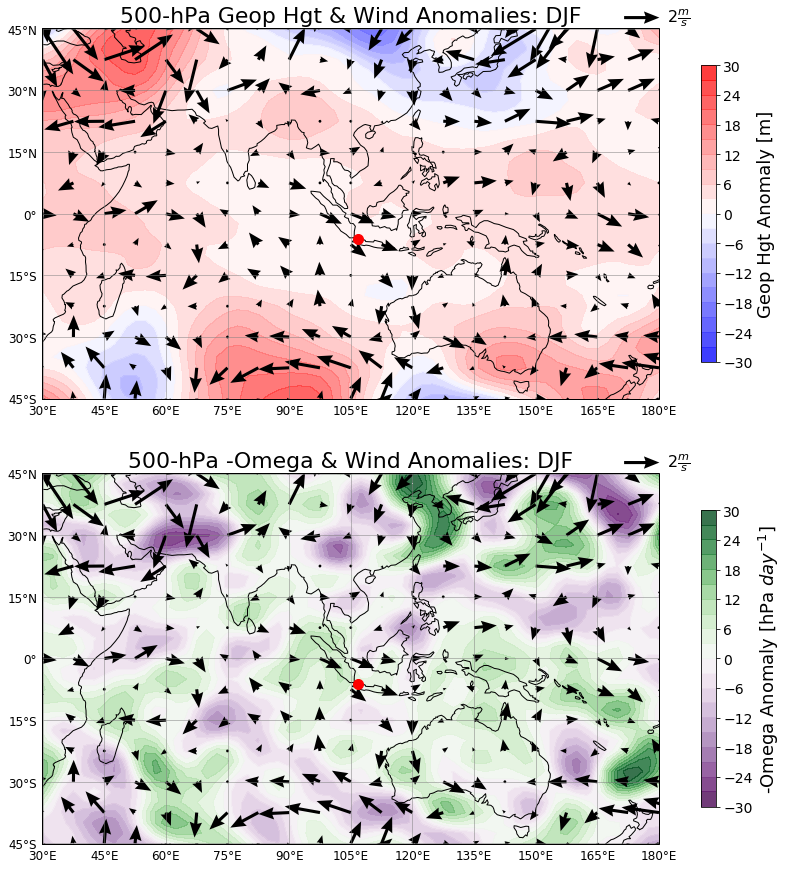

In [437]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('500-hPa Geop Hgt & Wind Anomalies: DJF', fontsize=22)
ax1.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c1 = ax1.contourf(combined_GeopHgt_500hPa_Anomaly.lon, combined_GeopHgt_500hPa_Anomaly.lat, combined_GeopHgt_500hPa_Anomaly,levels=np.linspace(-30,30,21),transform=ccrs.PlateCarree(),cmap='bwr', alpha=0.8)
g1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax1.coastlines()
ax1.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q1 = ax1.quiver(combined_Uwind_500hPa_Anomaly.lon[::3].values, combined_Uwind_500hPa_Anomaly.lat[::3].values, 
         combined_Uwind_500hPa_Anomaly[::3,::3].values, combined_Vwind_500hPa_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
ax1.quiverkey(Q1, 0.745, 0.89, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb1 = fig.colorbar(c1, shrink=0.8)
cb1.set_label('Geop Hgt Anomaly [m]', fontsize=18)
cb1.set_ticks(np.arange(-30,31,6))
cb1.ax.tick_params(labelsize=14)
########################################################################################################

ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('500-hPa -Omega & Wind Anomalies: DJF', fontsize=22)
ax2.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c2 = ax2.contourf(combined_Omega_500hPa_Anomaly.lon, combined_Omega_500hPa_Anomaly.lat, combined_Omega_500hPa_Anomaly*-864,levels=np.linspace(-30,30,21),transform=ccrs.PlateCarree(),cmap='PRGn', alpha=0.8)
g2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g2.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabel_style = {'size': 12}
g2.ylabel_style = {'size': 12}
g2.xlabels_top = False
g2.ylabels_right = False
ax2.coastlines()
ax2.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q2 = ax2.quiver(combined_Uwind_500hPa_Anomaly.lon[::3].values, combined_Uwind_500hPa_Anomaly.lat[::3].values, 
         combined_Uwind_500hPa_Anomaly[::3,::3].values, combined_Vwind_500hPa_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
ax2.quiverkey(Q2, 0.745, 0.478, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb2 = fig.colorbar(c2, shrink=0.8)
cb2.set_label('-Omega Anomaly [hPa $day^{-1}$]', fontsize=18)
cb2.set_ticks(np.arange(-30,31,6))
cb2.ax.tick_params(labelsize=14)

plt.show()

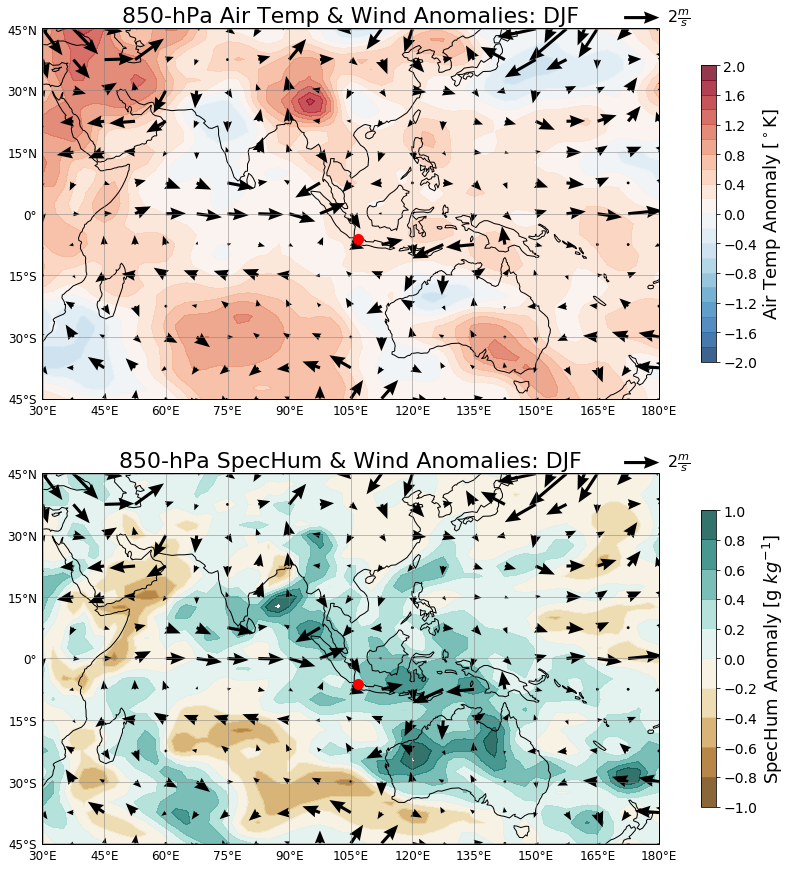

In [435]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('850-hPa Air Temp & Wind Anomalies: DJF', fontsize=22)
ax1.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c1 = ax1.contourf(combined_AirTemp_850hPa_Anomaly.lon, combined_AirTemp_850hPa_Anomaly.lat, combined_AirTemp_850hPa_Anomaly,levels=np.linspace(-2,2,21),transform=ccrs.PlateCarree(),cmap='RdBu_r', alpha=0.8)
g1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax1.coastlines()
ax1.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q1 = ax1.quiver(combined_Uwind_850hPa_Anomaly.lon[::3].values, combined_Uwind_850hPa_Anomaly.lat[::3].values, 
         combined_Uwind_850hPa_Anomaly[::3,::3].values, combined_Vwind_850hPa_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
ax1.quiverkey(Q1, 0.745, 0.89, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb1 = fig.colorbar(c1, shrink=0.8)
cb1.set_label('Air Temp Anomaly [$^\circ$K]', fontsize=18)
cb1.set_ticks(np.arange(-2,2.1,0.4))
cb1.ax.tick_params(labelsize=14)
########################################################################################################

ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('850-hPa SpecHum & Wind Anomalies: DJF', fontsize=22)
ax2.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c2 = ax2.contourf(combined_SpecHum_850hPa_Anomaly.lon, combined_SpecHum_850hPa_Anomaly.lat, combined_SpecHum_850hPa_Anomaly,levels=np.linspace(-1,1,11),transform=ccrs.PlateCarree(),cmap='BrBG', alpha=0.8)
g2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g2.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabel_style = {'size': 12}
g2.ylabel_style = {'size': 12}
g2.xlabels_top = False
g2.ylabels_right = False
ax2.coastlines()
ax2.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q2 = ax2.quiver(combined_Uwind_850hPa_Anomaly.lon[::3].values, combined_Uwind_850hPa_Anomaly.lat[::3].values, 
         combined_Uwind_850hPa_Anomaly[::3,::3].values, combined_Vwind_850hPa_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
ax2.quiverkey(Q2, 0.745, 0.478, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb2 = fig.colorbar(c2, shrink=0.8)
cb2.set_label('SpecHum Anomaly [g $kg^{-1}$]', fontsize=18)
cb2.set_ticks(np.arange(-1,1.1,0.2))
cb2.ax.tick_params(labelsize=14)

plt.show()

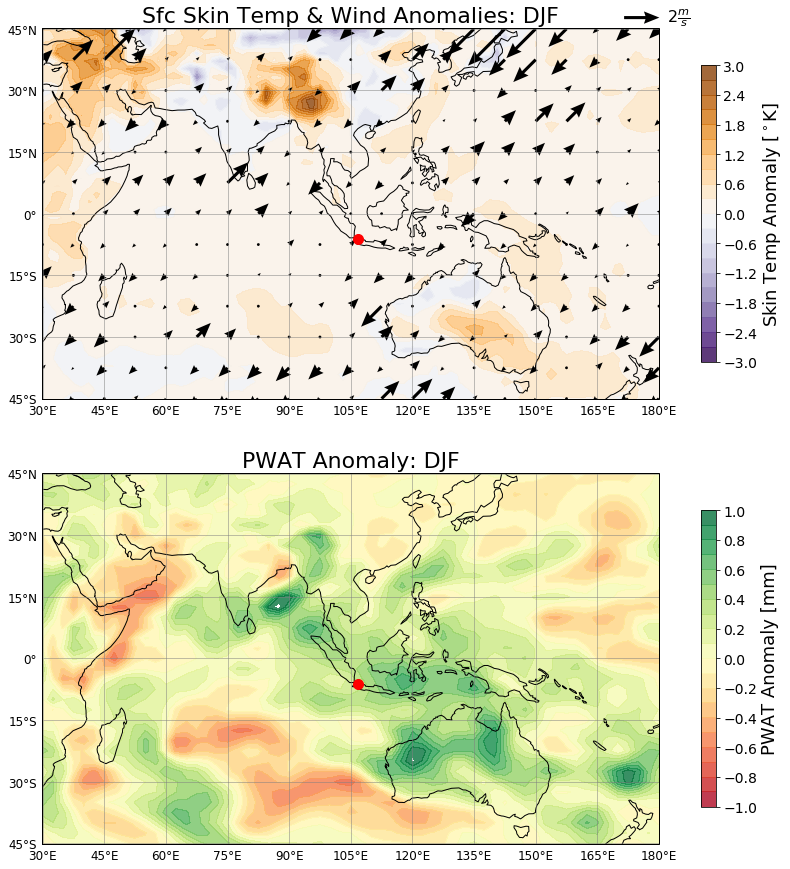

In [434]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('Sfc Skin Temp & Wind Anomalies: DJF', fontsize=22)
ax1.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c1 = ax1.contourf(combined_SkinTemp_Sfc_Anomaly.lon, combined_SkinTemp_Sfc_Anomaly.lat, combined_SkinTemp_Sfc_Anomaly,levels=np.linspace(-3,3,21),transform=ccrs.PlateCarree(),cmap='PuOr_r', alpha=0.8)
g1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g1.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g1.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 12}
g1.ylabel_style = {'size': 12}
g1.xlabels_top = False
g1.ylabels_right = False
ax1.coastlines()
ax1.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
Q1 = ax1.quiver(combined_Uwind_sig995_Anomaly.lon[::3].values, combined_Uwind_sig995_Anomaly.lat[::3].values, 
         combined_Uwind_sig995_Anomaly[::3,::3].values, combined_Uwind_sig995_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
ax1.quiverkey(Q1, 0.745, 0.89, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb1 = fig.colorbar(c1, shrink=0.8)
cb1.set_label('Skin Temp Anomaly [$^\circ$K]', fontsize=18)
cb1.set_ticks(np.arange(-3,3.1,0.6))
cb1.ax.tick_params(labelsize=14)
########################################################################################################

ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('PWAT Anomaly: DJF', fontsize=22)
ax2.set_extent([29.9, 180.1, -45.1, 45.1], ccrs.PlateCarree())
c2 = ax2.contourf(combined_SpecHum_850hPa_Anomaly.lon, combined_SpecHum_850hPa_Anomaly.lat, combined_SpecHum_850hPa_Anomaly,levels=np.linspace(-1,1,21),transform=ccrs.PlateCarree(),cmap='RdYlGn', alpha=0.8)
g2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')
g2.xlocator = mticker.FixedLocator(np.arange(30,181,15))
g2.ylocator = mticker.FixedLocator(np.arange(-90,91,15))
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
g2.xlabel_style = {'size': 12}
g2.ylabel_style = {'size': 12}
g2.xlabels_top = False
g2.ylabels_right = False
ax2.coastlines()
ax2.plot(106.85, -6.21, 'ro', markersize=10, transform=ccrs.PlateCarree())
# Q2 = ax2.quiver(combined_Uwind_sig995_Anomaly.lon[::3].values, combined_Uwind_sig995_Anomaly.lat[::3].values, 
#          combined_Uwind_sig995_Anomaly[::3,::3].values, combined_Uwind_sig995_Anomaly[::3,::3].values, scale=35., width=0.005, headwidth=4., headlength=5.)
# ax2.quiverkey(Q2, 0.745, 0.478, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure', fontproperties={'size': '16'})
cb2 = fig.colorbar(c2, shrink=0.8)
cb2.set_label('PWAT Anomaly [mm]', fontsize=18)
cb2.set_ticks(np.arange(-1,1.1,0.2))
cb2.ax.tick_params(labelsize=14)

plt.show()